In [181]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [182]:
test = pd.read_csv(r'F:\Machine Learning\Haker Earth\Predict the employee burn out rate\dataset\test.csv')
train = pd.read_csv(r'F:\Machine Learning\Haker Earth\Predict the employee burn out rate\dataset\train.csv')

combine = [train,test]



In [183]:
train.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67


In [184]:
train.keys()

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [185]:
train.shape

(22750, 9)

In [186]:
test.shape

(12250, 8)

In [187]:
train.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [188]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Employee ID             22750 non-null object
Date of Joining         22750 non-null object
Gender                  22750 non-null object
Company Type            22750 non-null object
WFH Setup Available     22750 non-null object
Designation             22750 non-null float64
Resource Allocation     21369 non-null float64
Mental Fatigue Score    20633 non-null float64
Burn Rate               21626 non-null float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
Employee ID             12250 non-null object
Date of Joining         12250 non-null object
Gender                  12250 non-null object
Company Type            12250 non-null object
WFH Setup Available     12250 non-null object
Designation             12250 non-null float64
Resource Allocation     12250 non-null float64
Mental Fatigue Score    12250 non-null float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


In [191]:
train[train['Gender']=='Male'].count()



Employee ID             10842
Date of Joining         10842
Gender                  10842
Company Type            10842
WFH Setup Available     10842
Designation             10842
Resource Allocation     10172
Mental Fatigue Score     9853
Burn Rate               10277
dtype: int64

In [192]:
train['Gender'].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

In [193]:
train['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [194]:
train['WFH Setup Available'].value_counts()

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

In [195]:
train['Designation'].value_counts()

2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: Designation, dtype: int64

In [196]:
train['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

In [197]:
train.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [198]:
columns = ['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate']

for i in columns:
    print(i," ",sum(train[i].isnull()))

Employee ID   0
Date of Joining   0
Gender   0
Company Type   0
WFH Setup Available   0
Designation   0
Resource Allocation   1381
Mental Fatigue Score   2117
Burn Rate   1124


In [199]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


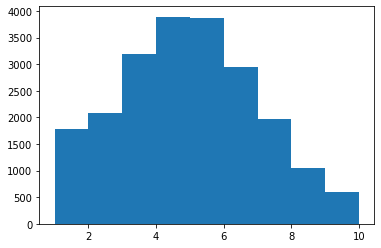

In [200]:
bins = [1,2,3,4,5,6,7,8,9,10]

plt.hist(train['Resource Allocation'],bins=bins)
plt.show()


<BarContainer object of 10 artists>

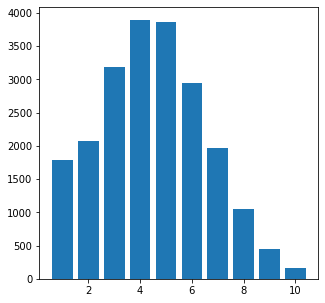

In [201]:
plt.figure(figsize=(5,5))
plt.bar(list (train['Resource Allocation'].value_counts().keys()),train['Resource Allocation'].value_counts())

In [202]:
train.std()

Designation             1.135145
Resource Allocation     2.047211
Mental Fatigue Score    1.920839
Burn Rate               0.198226
dtype: float64

In [203]:
train.fillna(train['Resource Allocation'].max()-6,inplace=True)

In [204]:
sum(train['Resource Allocation'].isnull())

0

<BarContainer object of 10 artists>

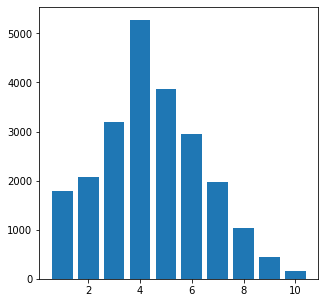

In [205]:
plt.figure(figsize=(5,5))
plt.bar(list (train['Resource Allocation'].value_counts().keys()),train['Resource Allocation'].value_counts())

In [206]:
train.std()

Designation             1.135145
Resource Allocation     1.987427
Mental Fatigue Score    1.896929
Burn Rate               0.792839
dtype: float64

In [207]:
train['Resource Allocation'].value_counts()

4.0     5274
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

<BarContainer object of 101 artists>

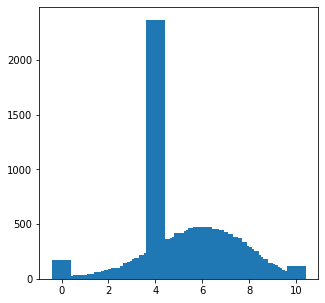

In [208]:
plt.figure(figsize=(5,5))
plt.bar(list (train['Mental Fatigue Score'].value_counts().keys()),train['Mental Fatigue Score'].value_counts())

In [209]:
train['Mental Fatigue Score'].value_counts()

4.0    2367
6.0     470
5.8     464
5.9     458
6.1     457
       ... 
0.5      24
0.2      23
0.4      19
0.1      17
0.3      13
Name: Mental Fatigue Score, Length: 101, dtype: int64

In [210]:
train['Mental Fatigue Score'].fillna(train['Mental Fatigue Score'].mean(),inplace=True)

In [211]:
sum(train['Mental Fatigue Score'].isnull())

0

<BarContainer object of 101 artists>

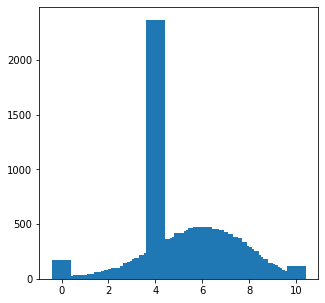

In [212]:
plt.figure(figsize=(5,5))
plt.bar(list (train['Mental Fatigue Score'].value_counts().keys()),train['Mental Fatigue Score'].value_counts())

In [213]:
train['Burn Rate'].fillna(train['Burn Rate'].mean(),inplace = True)

In [214]:
sum(train['Burn Rate'].isnull())

0

In [215]:
columns = ['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate']

for i in columns:
    print(i," ",sum(train[i].isnull()))

Employee ID   0
Date of Joining   0
Gender   0
Company Type   0
WFH Setup Available   0
Designation   0
Resource Allocation   0
Mental Fatigue Score   0
Burn Rate   0


In [216]:
combine = [train,test]

In [217]:
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].map({'Male':0 , 'Female':1}).astype(int)

train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,1,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,0,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,Service,No,3.0,7.0,6.9,0.52


In [218]:
for dataset in combine:
    dataset['WFH Setup Available'] = dataset['WFH Setup Available'].map({'Yes':1 , 'No':0}).astype(int)

In [219]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,Service,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,Service,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,1,Product,1,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,0,Service,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,Service,0,3.0,7.0,6.9,0.52


In [220]:
train['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [221]:
for dataset in combine:
    dataset['Company Type'] = dataset['Company Type'].map({'Service':1 , 'Product':0})
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,1,0,1,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52


In [222]:
#sns.pairplot(train)

In [223]:
train.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,1.000000,0.009789,0.073296,-0.113295,-0.138321,-0.135383,-0.048362
Company Type,0.009789,1.000000,0.005725,0.006095,0.006263,0.004231,-0.008832
WFH Setup Available,0.073296,0.005725,1.000000,-0.229720,-0.275692,-0.255268,-0.073660
Designation,-0.113295,0.006095,-0.229720,1.000000,0.850656,0.631919,0.175183
Resource Allocation,-0.138321,0.006263,-0.275692,0.850656,1.000000,0.713399,0.190875
Mental Fatigue Score,-0.135383,0.004231,-0.255268,0.631919,0.713399,1.000000,0.190945
Burn Rate,-0.048362,-0.008832,-0.073660,0.175183,0.190875,0.190945,1.000000


In [224]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,1,1,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,1,0,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,0,0,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,1,1,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,1,0,0,2.0,5.0,6.4


In [225]:
X_train = train[['Gender' , 'Company Type' , 'WFH Setup Available' , 'Designation','Resource Allocation' , 'Mental Fatigue Score']]
Y_train = train['Burn Rate']
X_test = test[['Gender' , 'Company Type' , 'WFH Setup Available' , 'Designation','Resource Allocation','Mental Fatigue Score']]

X_train.shape,Y_train.shape,X_test.shape


((22750, 6), (22750,), (12250, 6))

In [226]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

reg.score(X_train,Y_train)
acc_lin_reg = round(reg.score(X_train, Y_train) * 100, 2)
acc_lin_reg


4.36

In [230]:
from sklearn.svm import SVR
clf_svm = svm.SVR(kernel='linear')

clf_svm.fit(X_train, Y_train)

clf_svm.score(X_train,Y_train)
acc_svm = round(clf_svm.score(X_train,Y_train)*100,2)
acc_svm


0.23

In [231]:
Y_pred = reg.predict(X_test)
Y_pred

array([0.72835451, 0.49108846, 0.58119779, ..., 0.9544765 , 0.76886907,
       0.39933212])

In [236]:
output = pd.DataFrame({'Employee ID':test['Employee ID'],'Burn Rate':Y_pred})

In [237]:
output

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.728355
1,fffe31003300310037003800,0.491088
2,fffe33003400380035003900,0.581198
3,fffe3100370039003200,0.647001
4,fffe32003600390036003700,0.686699
...,...,...
12245,fffe3900310034003700,0.514946
12246,fffe32003600330034003000,0.609342
12247,fffe31003800340039003000,0.954476
12248,fffe32003600380031003800,0.768869


In [238]:
output.to_csv('F:\Machine Learning\Haker Earth\Predict the employee burn out rate\dataset\my_submission.csv',index=False)
print('Your Submission was successfully saved!')

Your Submission was successfully saved!
